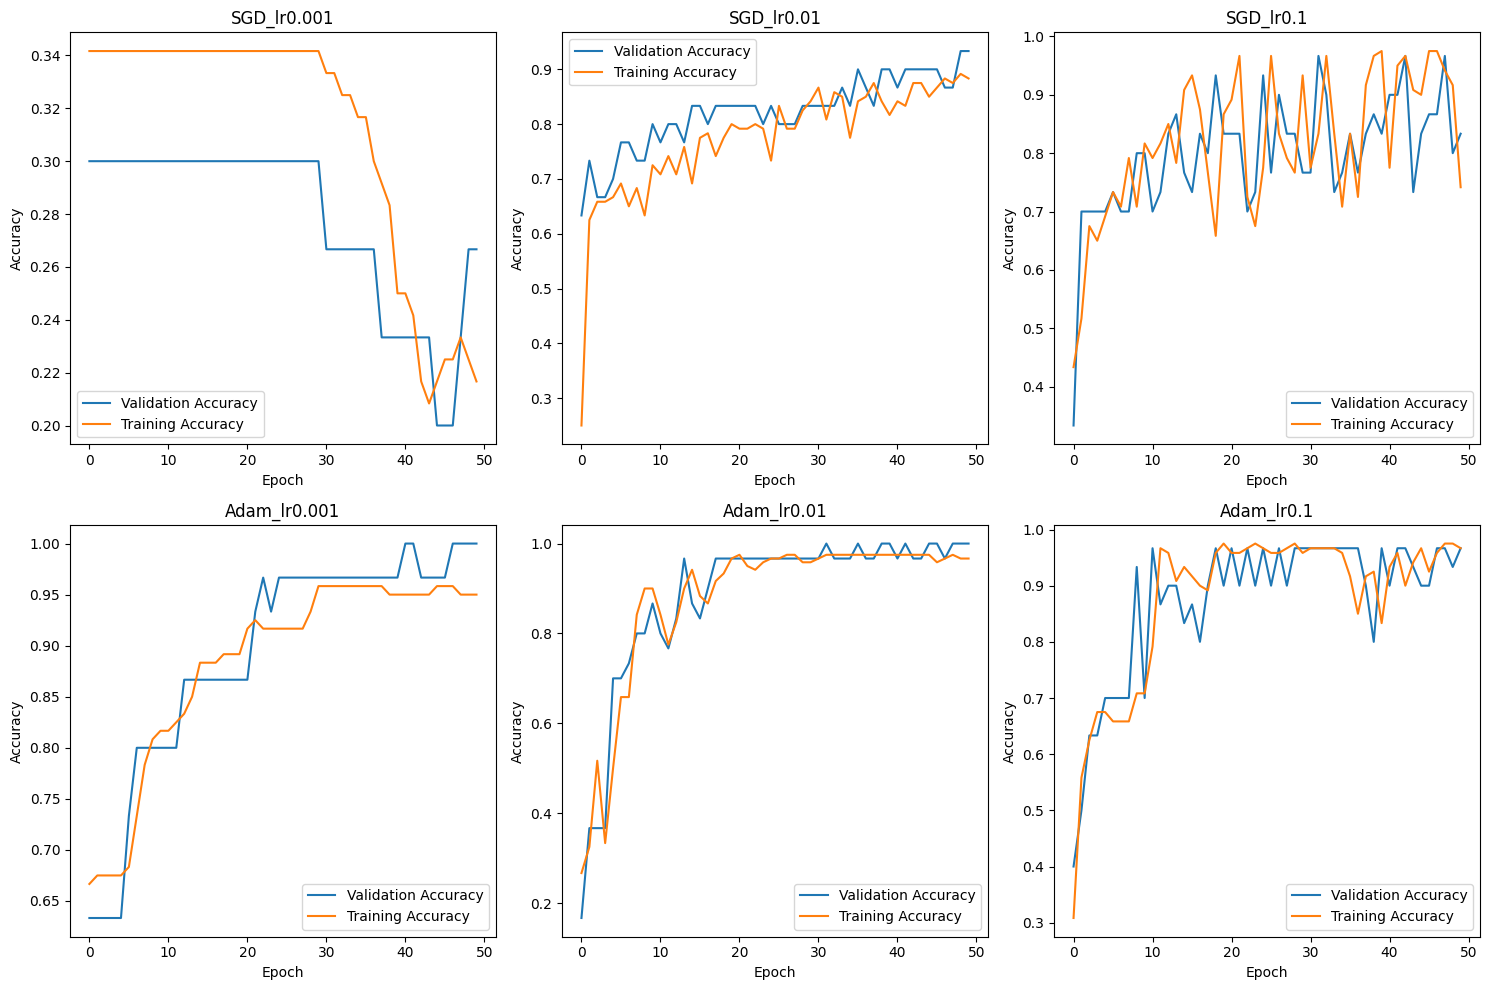

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Load and Split the Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = np.eye(3)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Model Creation Function
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

# Step 4: Train Models with Different Learning Rates & Optimizers
optimizers = ['SGD', 'Adam']
learning_rates = [0.001, 0.01, 0.1]
histories = {}

for opt in optimizers:
    for lr in learning_rates:
        model = create_model()

        if opt == 'SGD':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif opt == 'Adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
        histories[f"{opt}_lr{lr}"] = history


# Step 5: Plot the Results
plt.figure(figsize=(15, 10))
for i, (key, history) in enumerate(histories.items()):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title(key)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()


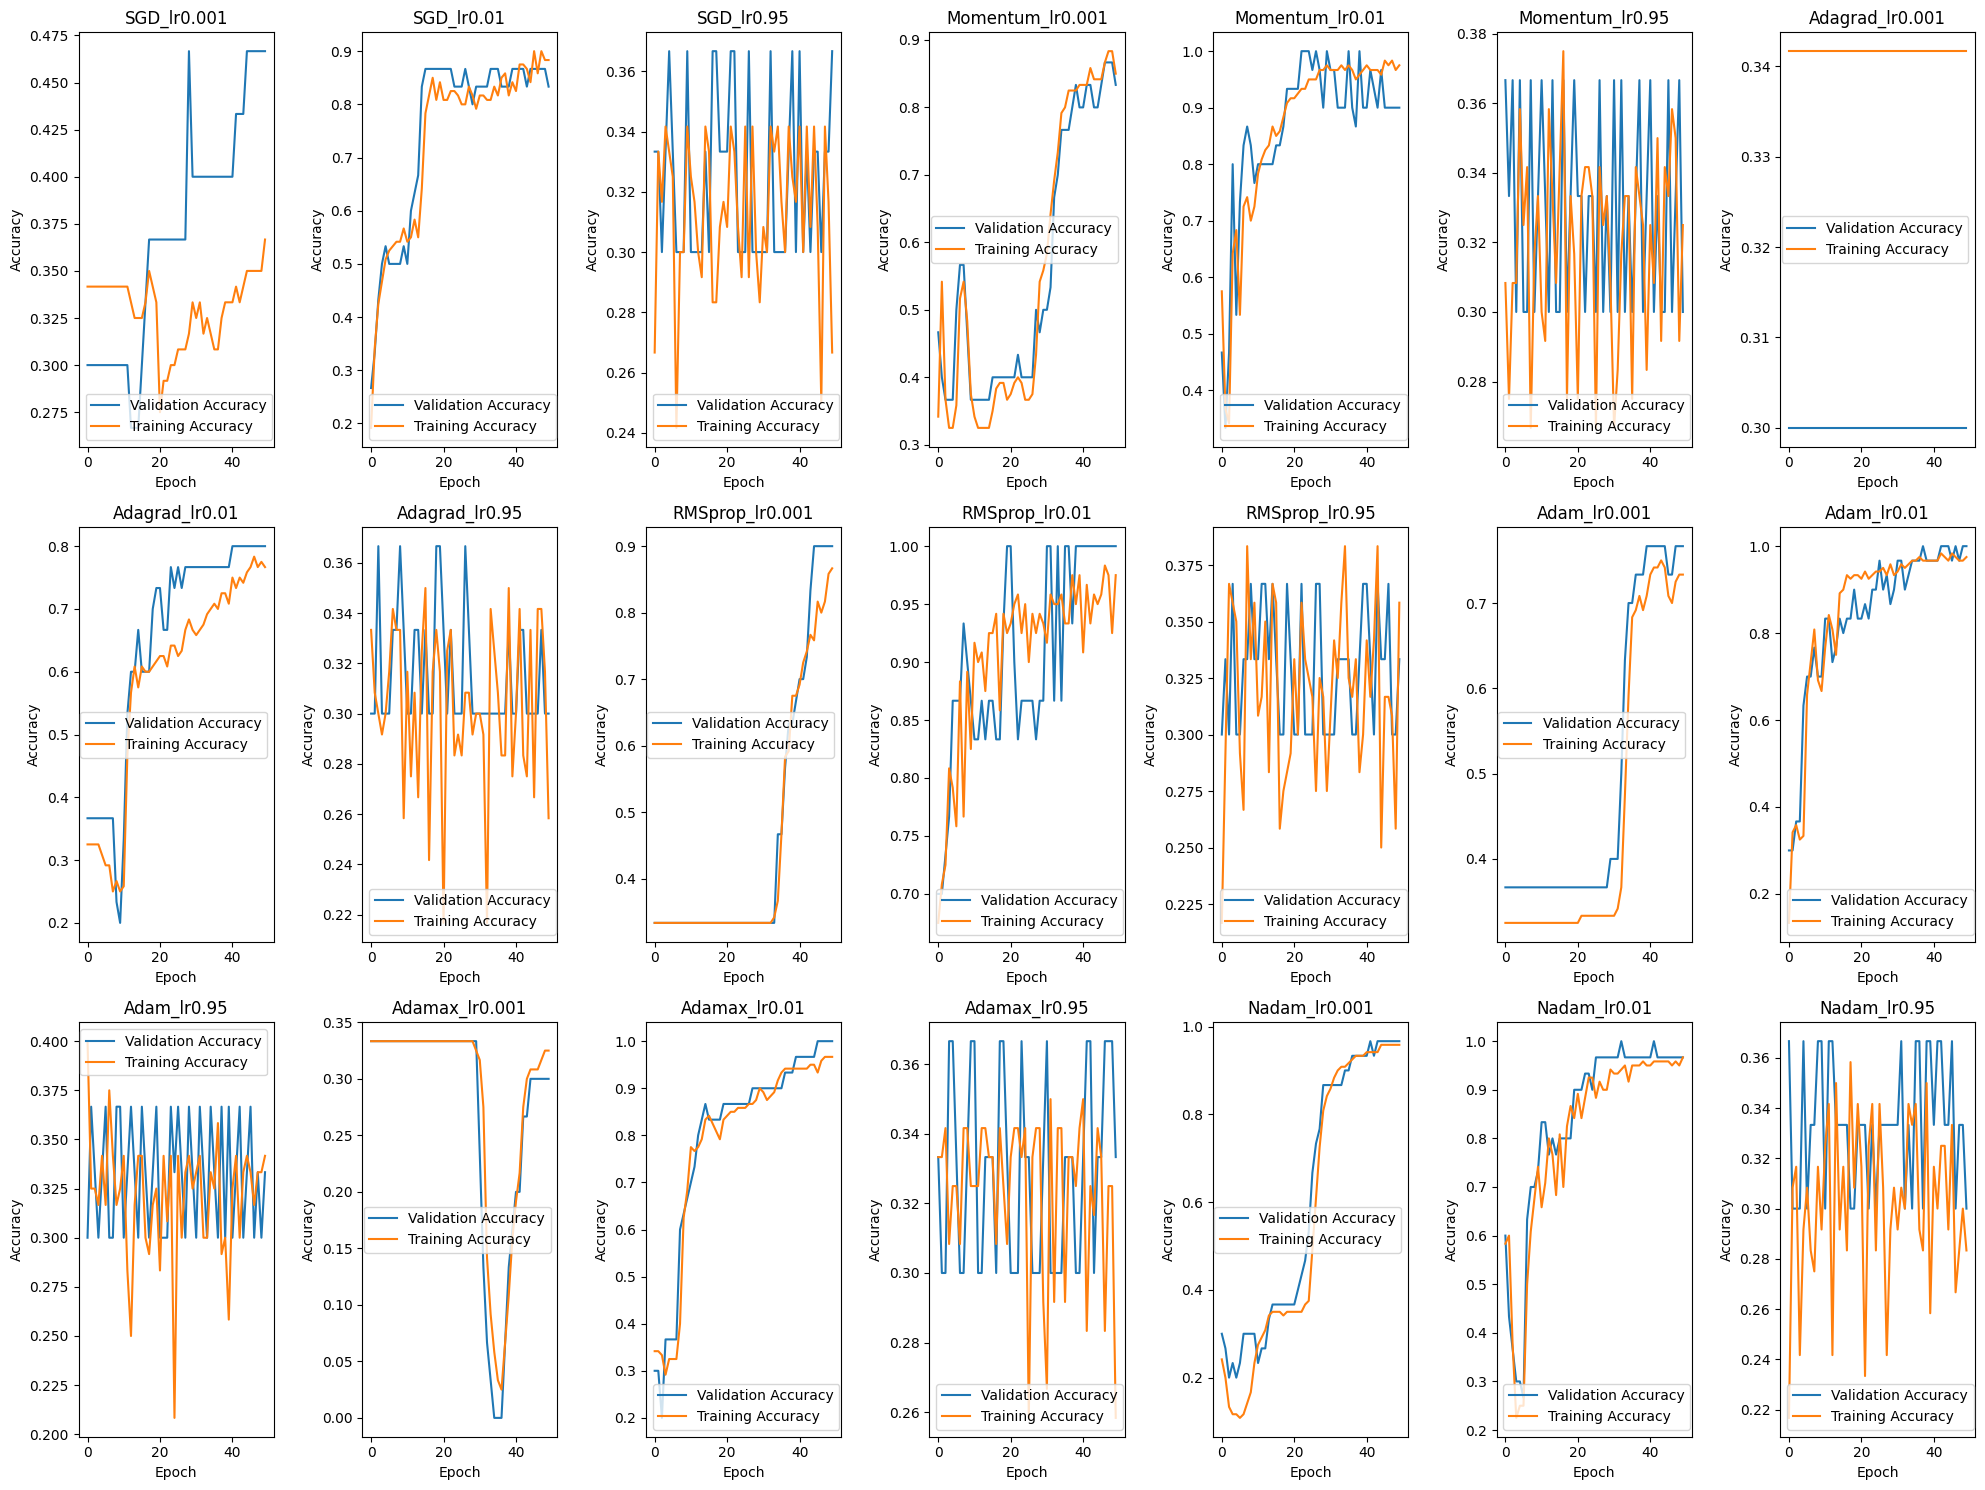

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 2: Load and Split the Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = np.eye(3)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Model Creation Function
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

# Step 4: Train Models with Different Learning Rates & Optimizers
optimizers = ['SGD', 'Momentum', 'Adagrad', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
learning_rates = [0.001, 0.01, 0.95]
histories = {}

for opt in optimizers:
    for lr in learning_rates:
        model = create_model()

        if opt == 'SGD':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif opt == 'Momentum':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9) # Momentum is technically SGD with momentum
        elif opt == 'Adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif opt == 'RMSprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif opt == 'Adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif opt == 'Adamax':

            optimizer = tf.keras.optimizers.Adamax(learning_rate=lr)
        elif opt == 'Nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
        histories[f"{opt}_lr{lr}"] = history

# Step 5: Plot the Results
plt.figure(figsize=(20, 15))
for i, (key, history) in enumerate(histories.items()):
    plt.subplot(3, 7, i+1) # Adjusted the subplot size to accommodate more plots
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title(key)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()
